# Physical Models of Living Systems: Homework 3
Laura Schulze (2122311)

1) *Choose a given type of ecological structure (e.g. mutualistic, or predator-prey, or etc...). Generate random matrices with for completely random and for the chosen ecological structures. You need to create $S\times S$ matrices ($S$ is the number of species) with $C$ non-zero entries and $1-C$ zeros ($C$ is the connectivity between 0 and 1). The non-zero elements are drawn at random from given distributions. Depending on the network structure some symmetries and constraints may hold. Please follow the detailed step-by-step explanation in the "`Homework-detail-week3-from-Allesina-Stability-Criteria-2012-Nature.pdf`" (Also uploaded in the Google Drive, note folder). fix $C$ and for $S=$20, 50, 100, 200 calculate the eigenvalues of the matrix and plot them against Real part (x-axis) and imaginary part (y-axis).*

 

3) *For case 2) plot the maximum real part eigenvalues for each $S$ (Max Re lambda as a function of $S$) and the probability of $P(\lambda >0)$ as a function of the proper control parameter (e.g. for the complete random case is $\sigma(SC)^0.5$. Compare these plots with the one for the complete random case (the original May case).*

 

4) *Optional: how the eigenvalues of the Jacobian of a GLV with constant growth rate set to 1 and random positive* $x^{*}$ *(for example taken from a Uniform distribution between 1 and 10) and random interactions are distributed? Does the circular or elliptic law still hold? And what about the stability-complexity paradox?*

 

In [1]:
# library imports
import numpy as np
import matplotlib.pyplot as plt
import scipy

np.random.seed(0)

## Generating random matrices 

In [2]:
S = 100  # number of species
C = 0.5  # level of connectance
d = 1.0  # diagonal coefficients value
sigma = 1.0  # standard deviation for random matrix coefficients

# random matrices
def generateRandomMatrix(S, C, d, sigma):
    M = np.zeros((S, S))  # initialize with zeros
    mask = (np.random.random((S, S)) <= C)  # generate mask based on uniform p <= C
    np.fill_diagonal(mask, False)  # diagonals will be filled with -d, so set mask to False
    num_nonzero = np.count_nonzero(mask)  # count nonzero mask entries
    M[mask] = np.random.normal(0, sigma, num_nonzero)  # draw normally distributed values
    np.fill_diagonal(M, -d)  # Set the diagonal to -d
    return M

# predator-prey matrices
def generatePredatorPreyMatrix(S, C, d, sigma):
    M = np.zeros((S, S))  # initialize with zeros
    i_upper, j_upper = np.triu_indices(S, k=1) # get upper triangular indices
    mask = np.random.random(len(i_upper)) <= C # generate mask based on connectance
    i_upper, j_upper = i_upper[mask], j_upper[mask] # filter indices based on mask
    num_nonzero_pairs = len(i_upper)  # number of nonzero entry pairs
    signs = (np.random.random(num_nonzero_pairs)<= 0.5)*2 - 1 # generate signs for nonzero entry pairs
    M[i_upper, j_upper] = signs*np.abs(np.random.normal(0, sigma, num_nonzero_pairs))  # draw upper normally distributed values
    M[j_upper, i_upper] = -signs*np.abs(np.random.normal(0, sigma, num_nonzero_pairs))  # draw lower normally distributed values with inverted sign
    np.fill_diagonal(M, -d)  # Set the diagonal to -d
    return M

# competition and mutialism mixture matrices
def generateCompetitionMutualismMatrix(S, C, d, sigma):
    M = np.zeros((S, S))  # initialize with zeros
    i_upper, j_upper = np.triu_indices(S, k=1) # get upper triangular indices
    mask = np.random.random(len(i_upper)) <= C # generate mask based on connectance
    i_upper, j_upper = i_upper[mask], j_upper[mask] # filter indices based on mask
    num_nonzero_pairs = len(i_upper)  # number of nonzero entry pairs
    signs = (np.random.random(num_nonzero_pairs)<= 0.5)*2 - 1 # generate signs for nonzero entry pairs
    M[i_upper, j_upper] = signs*np.abs(np.random.normal(0, sigma, num_nonzero_pairs))  # draw upper normally distributed values
    M[j_upper, i_upper] = signs*np.abs(np.random.normal(0, sigma, num_nonzero_pairs))  # draw lower normally distributed values with inverted sign
    np.fill_diagonal(M, -d)  # Set the diagonal to -d
    return M

# mutualism matrices
def generateMutualismMatrix(S, C, d, sigma):
    M = np.zeros((S, S))  # initialize with zeros
    i_upper, j_upper = np.triu_indices(S, k=1) # get upper triangular indices
    mask = np.random.random(len(i_upper)) <= C # generate mask based on connectance
    i_upper, j_upper = i_upper[mask], j_upper[mask] # filter indices based on mask
    num_nonzero_pairs = len(i_upper)  # number of nonzero entry pairs
    M[i_upper, j_upper] = np.abs(np.random.normal(0, sigma, num_nonzero_pairs))  # draw upper normally distributed values
    M[j_upper, i_upper] = np.abs(np.random.normal(0, sigma, num_nonzero_pairs))  # draw lower normally distributed values with inverted sign
    np.fill_diagonal(M, -d)  # Set the diagonal to -d
    return M

## Calculating and Plotting the Eigenvalues

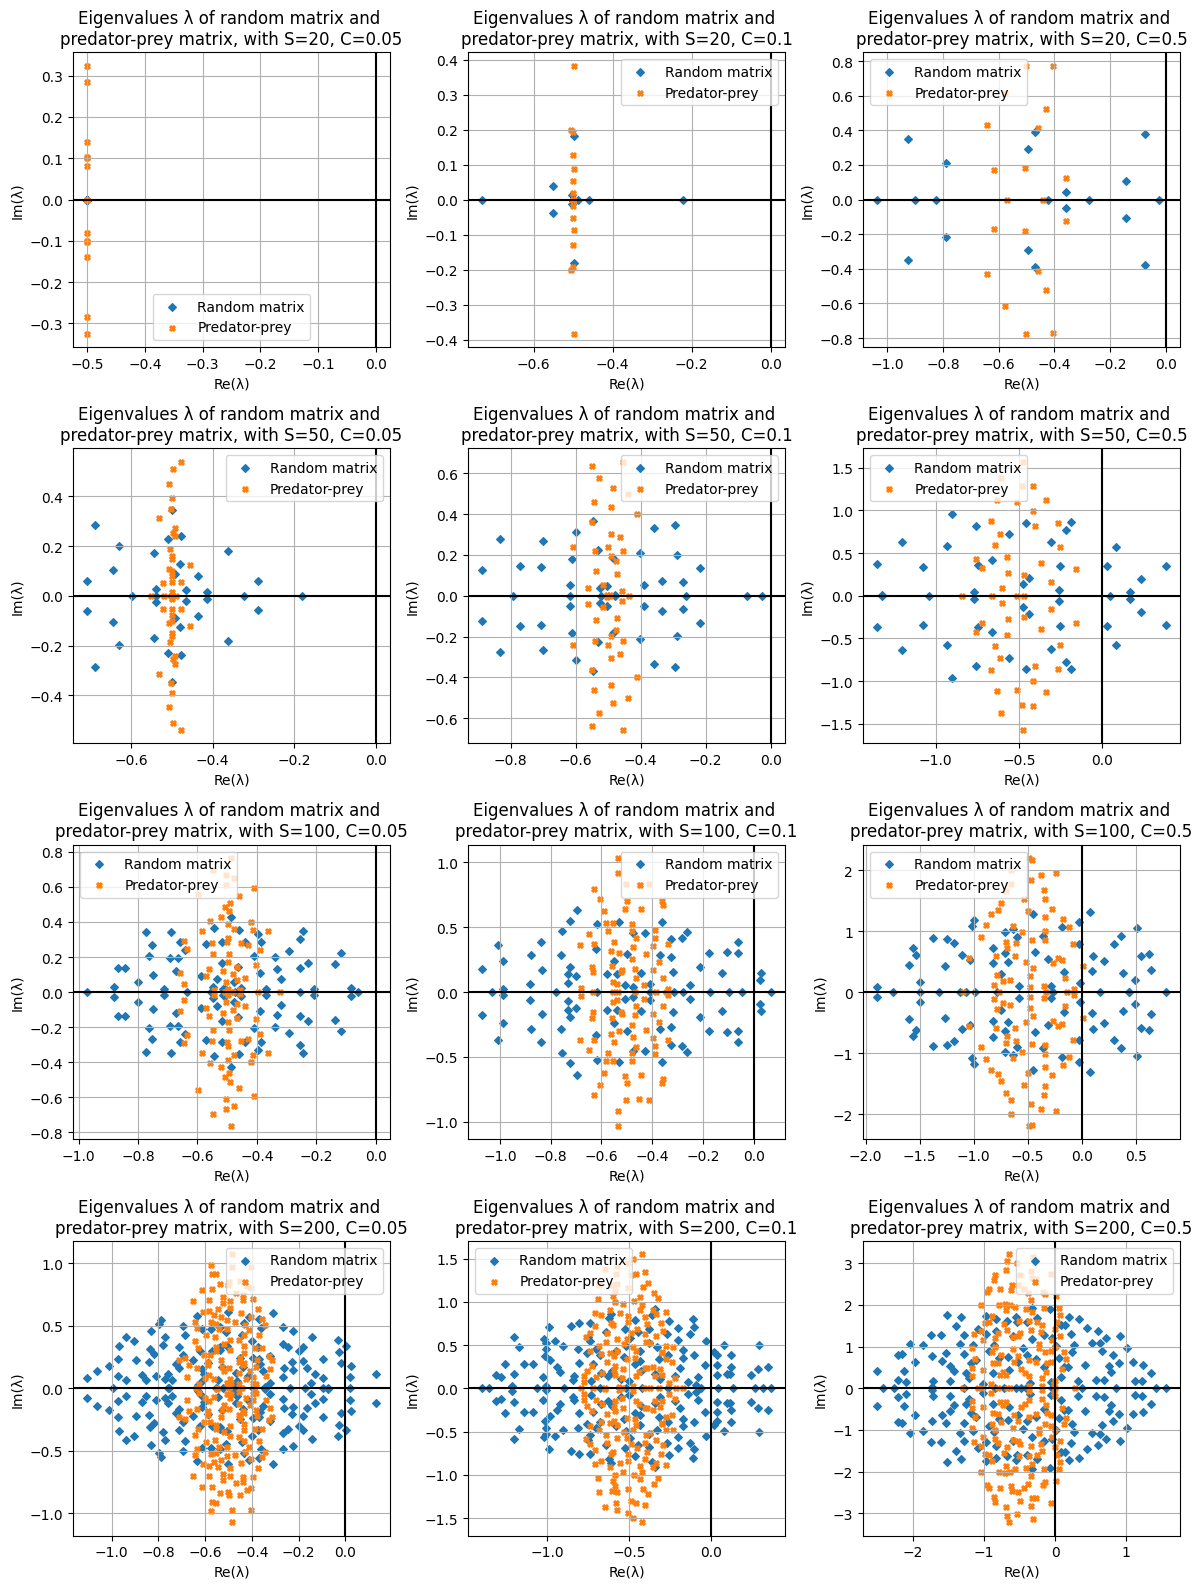

In [3]:
S_vals = [20, 50, 100, 200] # number of species
C_vals = [0.05, 0.1, 0.5]  # level of connectance
d = 0.5  # diagonal coefficients value
sigma = 0.2  # standard deviation for random matrix coefficients

fig, axes = plt.subplots(len(S_vals), len(C_vals), figsize=(len(C_vals)*4, len(S_vals)*4), tight_layout=True)
#fig, axes = plt.subplots(len(S_vals), len(C_vals), figsize=(len(C_vals)*4, len(S_vals)*4), tight_layout=True, sharex=True, sharey=True)

for i, S in enumerate(S_vals):
    for j, C in enumerate(C_vals):
        # generate matrices
        M_rand = generateRandomMatrix(S, C, d, sigma)  # random matrix
        M_pred = generatePredatorPreyMatrix(S, C, d, sigma)  # predator-prey matrix
        # compute eigenvalues
        vals_rand, _ = np.linalg.eig(M_rand)
        vals_pred, _ = np.linalg.eig(M_pred)
        # plot real and imaginary parts
        ax = axes[i, j]
        ax.axhline(0, color='k')
        ax.axvline(0, color='k')
        ax.scatter(np.real(vals_rand), np.imag(vals_rand), s=15, marker='D', label="Random matrix")
        ax.scatter(np.real(vals_pred), np.imag(vals_pred), s=15, marker='X', label="Predator-prey")
        ax.set_title(f"Eigenvalues λ of random matrix and \npredator-prey matrix, with S={S}, C={C}")
        ax.set_xlabel("Re(λ)")
        ax.set_ylabel("Im(λ)")
        ax.grid()
        ax.legend()

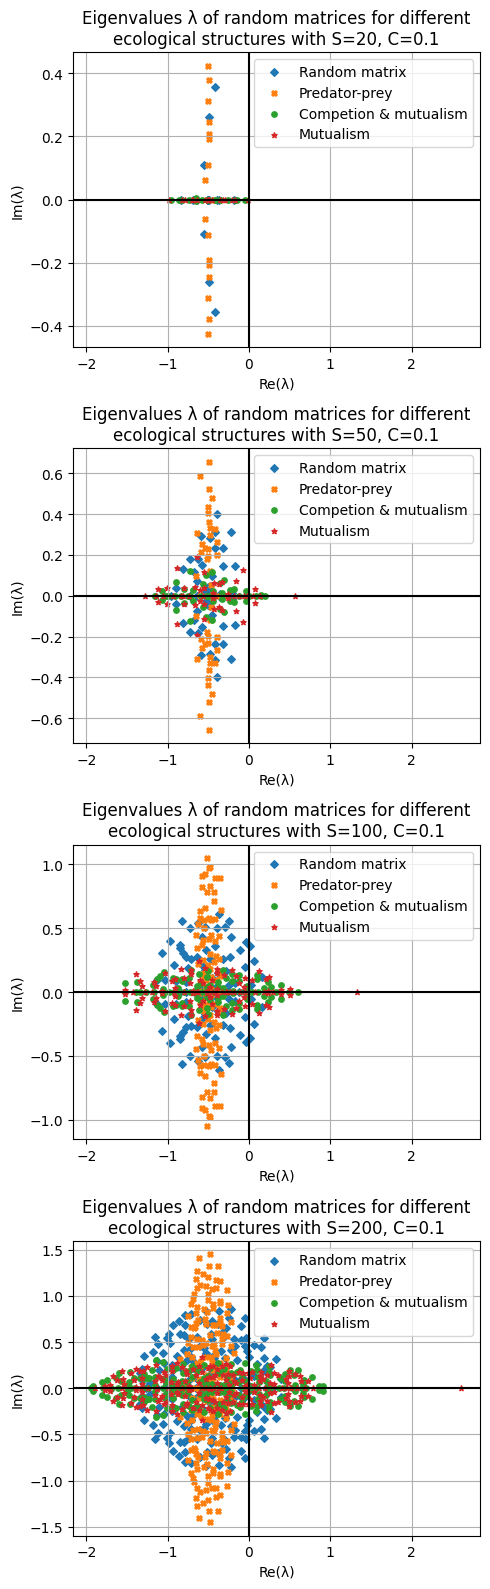

In [4]:
S_vals = [20, 50, 100, 200] # number of species
C = 0.1  # level of connectance
d = 0.5  # diagonal coefficients value
sigma = 0.2  # standard deviation for random matrix coefficients

fig, axes = plt.subplots(len(S_vals), 1, figsize=(5, len(S_vals)*4), tight_layout=True, sharex=True)

for i, S in enumerate(S_vals):
    # generate matrices
    M_rand = generateRandomMatrix(S, C, d, sigma)  # random matrix
    M_pred = generatePredatorPreyMatrix(S, C, d, sigma)  # predator-prey matrix
    M_comp_mutual = generateCompetitionMutualismMatrix(S, C, d, sigma) # competition mutualism mixture matriy
    M_mutual = generateMutualismMatrix(S, C, d, sigma)  # mutualism matrix
    # compute eigenvalues
    vals_rand, _ = np.linalg.eig(M_rand)
    vals_pred, _ = np.linalg.eig(M_pred)
    vals_comp_mutual, _ = np.linalg.eig(M_comp_mutual)
    vals_mutual, _ = np.linalg.eig(M_mutual)
    # plot real and imaginary parts
    ax = axes[i]
    ax.axhline(0, color='k')
    ax.axvline(0, color='k')
    ax.scatter(np.real(vals_rand), np.imag(vals_rand), s=15, marker='D', label="Random matrix")
    ax.scatter(np.real(vals_pred), np.imag(vals_pred), s=15, marker='X', label="Predator-prey")
    ax.scatter(np.real(vals_comp_mutual), np.imag(vals_comp_mutual), s=15, marker='o', label="Competion & mutualism")
    ax.scatter(np.real(vals_mutual), np.imag(vals_mutual), s=15, marker='*', label="Mutualism")
    ax.set_title(f"Eigenvalues λ of random matrices for different\necological structures with S={S}, C={C}")
    ax.set_xlabel("Re(λ)")
    ax.set_ylabel("Im(λ)")
    ax.xaxis.set_tick_params(labelbottom=True)
    ax.grid(zorder=-2)
    ax.legend()

## Maximum real part eigenvalues and probability of positive real part eigenvalues
*For case 2) plot the maximum real part eigenvalues for each $S$ (Max Re lambda as a function of $S$) and the probability of $P(\lambda >0)$ as a function of the proper control parameter (e.g. for the complete random case is $\sigma(SC)^{0.5}$. Compare these plots with the one for the complete random case (the original May case).*

Note: The expectation of the folded normal distribution $E(|x|)$ where $x$ normally distributed with mean $\mu = 0$, and standard deviation $\sigma^2$, is given by  $E(|x|) = \sigma \sqrt{\frac{2}{\pi}}$, so $E^2(|x|) = \sigma^2\frac{2}{\pi}$.

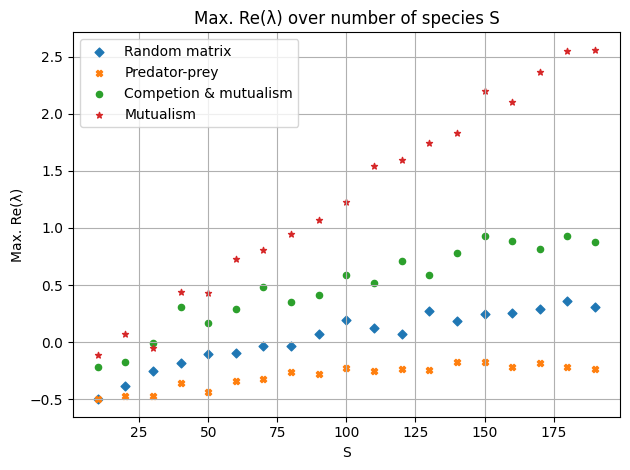

In [5]:
C = 0.1  # level of connectance
d = 0.5  # diagonal coefficients value
sigma = 0.2  # standard deviation for random matrix coefficients

S_vals = np.arange(10, 200, 10) # number of species

# prepare lists for the maximum real parts of the eigenvalues
max_rand = []  # random matrix
max_pred = []  # predator-prey
max_comp_mutual = []  # competition mutualism mix
max_mutual = []  # mutualism

for i, S in enumerate(S_vals):
    # generate matrices
    M_rand = generateRandomMatrix(S, C, d, sigma)  # random matrix
    M_pred = generatePredatorPreyMatrix(S, C, d, sigma)  # predator-prey matrix
    M_comp_mutual = generateCompetitionMutualismMatrix(S, C, d, sigma) # competition mutualism mixture matrix
    M_mutual = generateMutualismMatrix(S, C, d, sigma)  # mutualism matrix
    # compute maximum real part of eigenvalues
    vals_rand, _ = np.linalg.eig(M_rand)
    max_rand.append(np.max(np.real(vals_rand)))
    vals_pred, _ = np.linalg.eig(M_pred)
    max_pred.append(np.max(np.real(vals_pred)))
    vals_comp_mutual, _ = np.linalg.eig(M_comp_mutual)
    max_comp_mutual.append(np.max(np.real(vals_comp_mutual)))
    vals_mutual, _ = np.linalg.eig(M_mutual)
    max_mutual.append(np.max(np.real(vals_mutual)))   

fig, ax = plt.subplots(tight_layout=True)
ax.scatter(S_vals, max_rand, s=20, marker='D', label="Random matrix")
ax.scatter(S_vals, max_pred, s=20, marker='X', label="Predator-prey")
ax.scatter(S_vals, max_comp_mutual, s=20, marker='o', label="Competion & mutualism")
ax.scatter(S_vals, max_mutual, s=20, marker='*', label="Mutualism")
ax.set_title(f"Max. Re(λ) over number of species S")
ax.set_xlabel("S")
ax.set_ylabel("Max. Re(λ)")
ax.grid()
ax.legend()
plt.show()

The maximum real parts of the eigenvalues for the mutualistic increase the fastest. The predator-prey structure, on the other hand, shows a slow increase and remains below 0 for the inspected range of $S$, in alignment with their tendency to be more stable.

In [6]:
C = 0.1  # level of connectance
d = 0.5  # diagonal coefficients value
sigma = 0.2  # standard deviation for random matrix coefficients

N = 100  # repetitions

# Prob of max real part of eigvals > 0
P_rand = []  # random matrix
P_pred = []  # predator-prey
P_comp_mutual = []  # competition mutualism mix
P_mutual = []  # mutualism

for i, S in enumerate(S_vals):
    # prepare lists for the maximum real parts of the eigenvalues
    max_rand = []  # random matrix
    max_pred = []  # predator-prey
    max_comp_mutual = []  # competition mutualism mix
    max_mutual = []  # mutualism
    # run with N different random matrix initialisations
    for _ in range(N):
        # generate matrices
        M_rand = generateRandomMatrix(S, C, d, sigma)  # random matrix
        M_pred = generatePredatorPreyMatrix(S, C, d, sigma)  # predator-prey matrix
        M_comp_mutual = generateCompetitionMutualismMatrix(S, C, d, sigma) # competition mutualism mixture matrix
        M_mutual = generateMutualismMatrix(S, C, d, sigma)  # mutualism matrix
        # compute maximum real part of eigenvalues
        vals_rand, _ = np.linalg.eig(M_rand)
        max_rand.append(np.max(np.real(vals_rand)))
        vals_pred, _ = np.linalg.eig(M_pred)
        max_pred.append(np.max(np.real(vals_pred)))
        vals_comp_mutual, _ = np.linalg.eig(M_comp_mutual)
        max_comp_mutual.append(np.max(np.real(vals_comp_mutual)))
        vals_mutual, _ = np.linalg.eig(M_mutual)
        max_mutual.append(np.max(np.real(vals_mutual)))   

    # fraction of simulations where max. real part of eigvals was positive
    P_rand.append(np.sum(np.array(max_rand) > 0) / N)  
    P_pred.append(np.sum(np.array(max_pred) > 0) / N)  
    P_comp_mutual.append(np.sum(np.array(max_comp_mutual) > 0) / N)  
    P_mutual.append(np.sum(np.array(max_mutual) > 0) / N)    # mutualism

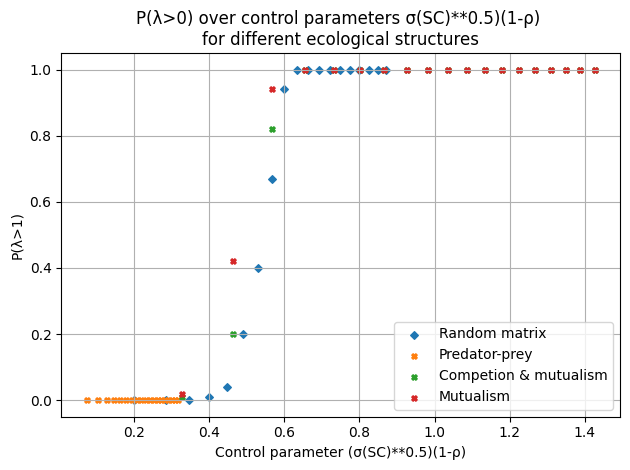

In [7]:
# control parameters
control_rand = sigma*(S_vals*C)**0.5
control_pred = sigma*(S_vals*C)**0.5*(1-2/np.pi)
control_comp_mutual = sigma*(S_vals*C)**0.5*(1+2/np.pi)
control_mutual = sigma*(S_vals*C)**0.5*(1+2/np.pi)

fig, ax = plt.subplots(tight_layout=True)
ax.scatter(control_rand, P_rand, s=15, marker='D', label="Random matrix")
ax.scatter(control_pred, P_pred, s=15, marker='X', label="Predator-prey")
ax.scatter(control_comp_mutual, P_comp_mutual, s=15, marker='X', label="Competion & mutualism")
ax.scatter(control_mutual, P_mutual, s=15, marker='X', label="Mutualism")
ax.set_title(f"P(λ>0) over control parameters σ(SC)**0.5)(1-ρ) \nfor different ecological structures")
ax.set_xlabel("Control parameter (σ(SC)**0.5)(1-ρ)")
ax.set_ylabel("P(λ>1)")
ax.grid()
ax.legend()
plt.show()

We can observe the phase transitions from stability to instability for the different models roughly around the control parameter reaching 0.5, which is what $d$ was set to, matching the expections. For the predator-prey model with the given range of $S$ values we do not reach the phase transition yet. Note that the control parameter $\propto \sqrt{S}$ in all cases, and scaled with a different factor for the different ecological structures.  

Let's plot the $P(\lambda>0)$ over $S$ as well:

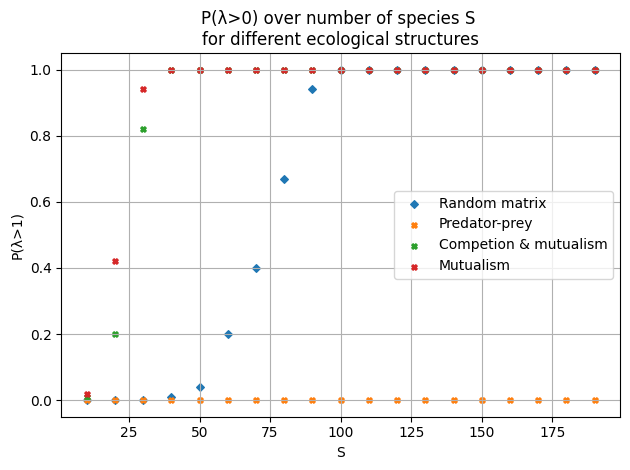

In [8]:
# and the same over just S
fig, ax = plt.subplots(tight_layout=True)
ax.scatter(S_vals, P_rand, s=15, marker='D', label="Random matrix")
ax.scatter(S_vals, P_pred, s=15, marker='X', label="Predator-prey")
ax.scatter(S_vals, P_comp_mutual, s=15, marker='X', label="Competion & mutualism")
ax.scatter(S_vals, P_mutual, s=15, marker='X', label="Mutualism")
ax.set_title(f"P(λ>0) over number of species S \nfor different ecological structures")
ax.set_xlabel("S")
ax.set_ylabel("P(λ>1)")
ax.grid()
ax.legend()
plt.show()

### Second Attempt
To better visualise, let's try to iterate over the control parameter instead and calculate the number of species S from it, to reach a similar control parameter range for each of the different ecological structures. (Note: This may take a bit longer to run, because for the predator-prey case we need somewhat large $S$ (and thus bigger matrices) to reach the given range.) 

In [9]:
C = 0.2  # level of connectance
d = 0.5  # diagonal coefficients value
sigma = 0.2  # standard deviation for random matrix coefficients
control_vals = np.arange(0.2, 0.8, 0.05) # control parameter
N = 100  # repetitions

# Prob of max real part of eigvals > 0
P_rand = []  # random matrix
P_pred = []  # predator-prey
P_comp_mutual = []  # competition mutualism mix
P_mutual = []  # mutualism

for i, control in enumerate(control_vals):
    print(f"Setting {i+1} / {len(control_vals)}")
    # prepare lists for the maximum real parts of the eigenvalues
    max_rand = []  # random matrix
    max_pred = []  # predator-prey
    max_comp_mutual = []  # competition mutualism mix
    max_mutual = []  # mutualism
    # run with N different random matrix initialisations
    for i in range(N):
        # print(f"Iteration {i}/{N}")
        # generate matrices
        M_rand = generateRandomMatrix(int((control/(sigma))**2/C), C, d, sigma)  # random matrix
        M_pred = generatePredatorPreyMatrix(int((control/(sigma*(1-2/np.pi)))**2/C), C, d, sigma)  # predator-prey matrix
        M_comp_mutual = generateCompetitionMutualismMatrix(int((control/(sigma*(1+2/np.pi)))**2/C), C, d, sigma) # competition mutualism mixture matrix
        M_mutual = generateMutualismMatrix(int((control/(sigma*(1+2/np.pi)))**2/C), C, d, sigma)  # mutualism matrix
        # compute maximum real part of eigenvalues
        vals_rand, _ = np.linalg.eig(M_rand)
        max_rand.append(np.max(np.real(vals_rand)))
        vals_pred, _ = np.linalg.eig(M_pred)
        max_pred.append(np.max(np.real(vals_pred)))
        vals_comp_mutual, _ = np.linalg.eig(M_comp_mutual)
        max_comp_mutual.append(np.max(np.real(vals_comp_mutual)))
        vals_mutual, _ = np.linalg.eig(M_mutual)
        max_mutual.append(np.max(np.real(vals_mutual)))   

    # fraction of simulations where max. real part of eigvals was positive
    P_rand.append(np.sum(np.array(max_rand) > 0) / N)  
    P_pred.append(np.sum(np.array(max_pred) > 0) / N)  
    P_comp_mutual.append(np.sum(np.array(max_comp_mutual) > 0) / N)  
    P_mutual.append(np.sum(np.array(max_mutual) > 0) / N)    # mutualism

Setting 1 / 13
Setting 2 / 13
Setting 3 / 13
Setting 4 / 13
Setting 5 / 13
Setting 6 / 13
Setting 7 / 13
Setting 8 / 13
Setting 9 / 13
Setting 10 / 13
Setting 11 / 13
Setting 12 / 13
Setting 13 / 13


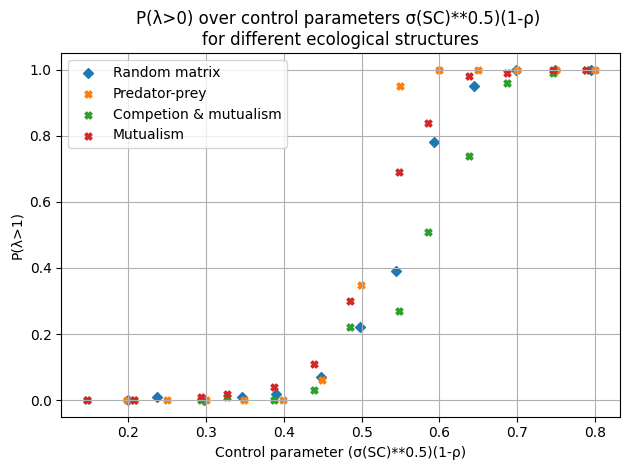

In [10]:
S_rand = [int((control/(sigma))**2/C) for control in control_vals]
S_pred = [int((control/(sigma*(1-2/np.pi)))**2/C)  for control in control_vals]
S_mutual = [int((control/(sigma*(1+2/np.pi)))**2/C) for control in control_vals]
# this is super inelegant but
# get the actual control parameters based on the integer conversion
control_rand = sigma*(np.array(S_rand)*C)**0.5
control_pred = sigma*(np.array(S_pred)*C)**0.5*(1-2/np.pi)
control_comp_mutual = sigma*(np.array(S_mutual)*C)**0.5*(1+2/np.pi)
control_mutual = sigma*(np.array(S_mutual)*C)**0.5*(1+2/np.pi)

fig, ax = plt.subplots(tight_layout=True)
ax.scatter(control_rand, P_rand, s=25, marker='D', label="Random matrix")
ax.scatter(control_pred, P_pred, s=25, marker='X', label="Predator-prey")
ax.scatter(control_comp_mutual, P_comp_mutual, s=25, marker='X', label="Competion & mutualism")
ax.scatter(control_mutual, P_mutual, s=25, marker='X', label="Mutualism")
ax.set_title(f"P(λ>0) over control parameters σ(SC)**0.5)(1-ρ) \nfor different ecological structures")
ax.set_xlabel("Control parameter (σ(SC)**0.5)(1-ρ)")
ax.set_ylabel("P(λ>1)")
ax.grid()
ax.legend()
plt.show()

Now we can see the phase transition around $d=0.5$ for all if the ecological structures.

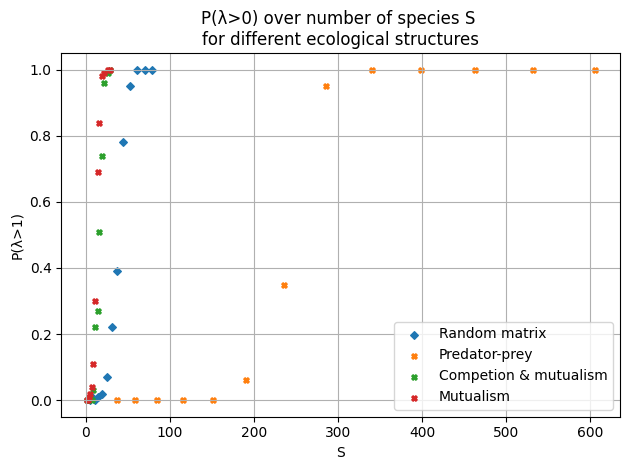

In [11]:
# and the same over just S
fig, ax = plt.subplots(tight_layout=True)
ax.scatter(S_rand, P_rand, s=15, marker='D', label="Random matrix")
ax.scatter(S_pred, P_pred, s=15, marker='X', label="Predator-prey")
ax.scatter(S_mutual, P_comp_mutual, s=15, marker='X', label="Competion & mutualism")
ax.scatter(S_mutual, P_mutual, s=15, marker='X', label="Mutualism")
ax.set_title(f"P(λ>0) over number of species S \nfor different ecological structures")
ax.set_xlabel("S")
ax.set_ylabel("P(λ>1)")
ax.grid()
ax.legend()
plt.show()